In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('FoodPrice_in_Turkey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [3]:
product_names = list(df['ProductName'].unique()) 
print(product_names)

['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail', 'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail', 'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail', 'Pasta - Retail', 'Tomatoes - Retail', 'Groundnuts (shelled) - Retail', 'Bread (common) - Retail', 'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail', 'Cabbage - Retail', 'Meat (mutton) - Retail', 'Oil (sunflower) - Retail', 'Salt - Retail', 'Coffee (instant) - Retail', 'Peas (green, dry) - Retail', 'Apples (red) - Retail', 'Cauliflower - Retail', 'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail', 'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail', 'Tea - Retail', 'Fuel (petrol-gasoline) - Retail', 'Transport (public) - Retail', 'Tomatoes (paste) - Retail', 'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail', 'Yogurt - Retail', 'Bread (pita) - Retail', 'Cucumbers - Retail', 'Fish (fresh) - Retail', 'Spinach - Retail', 'Cheese - Retail', 'Meat (veal) - Retail', 'Eg

In [4]:
df_rice = df.loc[(df.ProductName== 'Rice - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của gạo năm 2019: ' +str(df_rice.shape[0])) 

Số lượng bản ghi của gạo năm 2019: 48


<Axes: >

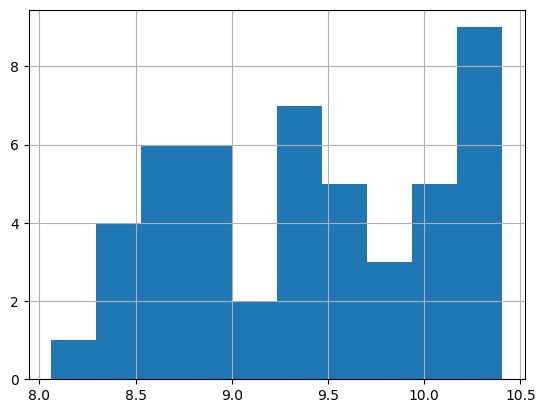

In [5]:
df_rice.Price.hist()

In [6]:
print( stats.ttest_1samp(df_rice.Price, 9.5))

TtestResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567, df=47)


Số lượng bản ghi của bột mỳ năm 2019: 48


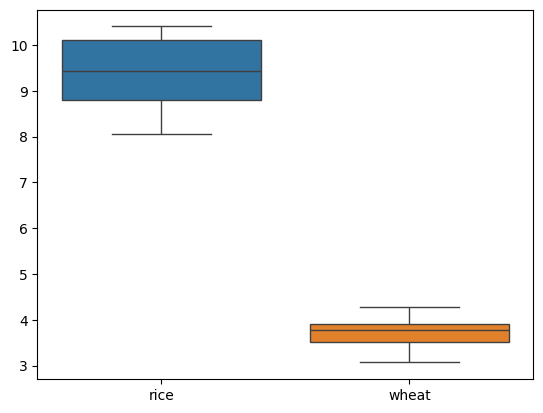

In [7]:
df_wheat = df.loc[(df.ProductName== 'Wheat flour - Retail') & (df.Year == 2019)]
print ('Số lượng bản ghi của bột mỳ năm 2019: '+str(df_wheat.shape[0])) 
import seaborn as sns
# Tạo boxplot so sánh phân bố của bột mỳ vào gao
price = {'rice': list(df_rice["Price"]), 'wheat': list(df_wheat['Price'])}
df_price = pd.DataFrame(price)
sns.boxplot(data=df_price)
plt.show()

In [8]:
print(stats.ttest_ind(price['rice'], price['wheat'], equal_var=False))

TtestResult(statistic=53.751692036304206, pvalue=7.110465285860583e-55, df=63.83639804430086)


In [9]:
del (df_rice, df_price, df_wheat, price)

C:\Users\vcn001-cl\AppData\Local\Temp\ipykernel_25720\2836641407.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))


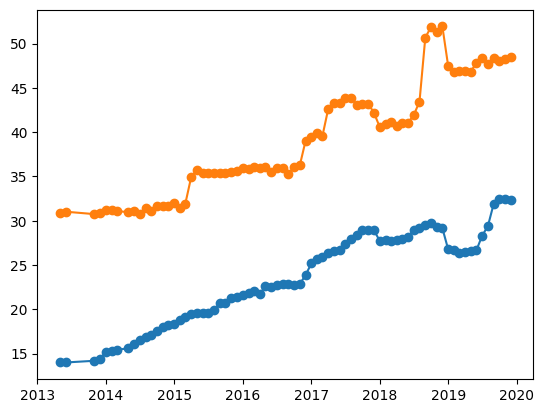

In [10]:
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))
# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')

In [11]:
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df1 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df1 = df1.rename(columns = {'Price':'Tea - Retail'})

df2 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df2 = df2.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df1, df2, on = 'time-place')
Processed_data.head()

C:\Users\vcn001-cl\AppData\Local\Temp\ipykernel_25720\2411240397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


,time-place,Tea - Retail,Coffee - Retail
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


In [12]:
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15
# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

End